In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import colors
import os
import glob

import h5py
from vars_climaX import vars_climaX


### Plot Increment

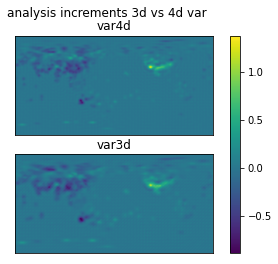

In [5]:
var4d_dir = '/eagle/MDClimSim/mjp5595/data/var4d_oldObs/'
var3d_dir = '/eagle/MDClimSim/mjp5595/data/var3d/'

analysis0_4d = np.load(var4d_dir+'analysis_0_0001012014.npy')
analysis1_4d = np.load(var4d_dir+'analysis_1_1201012014.npy')
innov_4d = analysis1_4d - analysis0_4d

analysis0_3d = np.load(var3d_dir+'analysis_0_0001012014.npy')
analysis1_3d = np.load(var3d_dir+'analysis_1_1201012014.npy')
innov_3d = analysis1_3d - analysis0_3d

images = []
fig, axs = plt.subplots(2,1,sharex=True,sharey=True)
plt.suptitle('analysis increments 3d vs 4d var')
images.append(axs[0].imshow(innov_4d[0,0,::-1,:]))
axs[0].set_title('var4d')
axs[0].xaxis.set_tick_params(labelbottom=False)
axs[0].yaxis.set_tick_params(labelleft=False)
axs[0].set_xticks([])
axs[0].set_yticks([])
images.append(axs[1].imshow(innov_3d[0,0,::-1,:]))
axs[1].set_title('var3d')
axs[1].xaxis.set_tick_params(labelbottom=False)
axs[1].yaxis.set_tick_params(labelleft=False)
axs[1].set_xticks([])
axs[1].set_yticks([])

vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0],ax=axs)

plt.savefig('figs/analysis_increment.png')

### Plot rMSE vs ERA5

In [11]:
from torchvision.transforms import transforms
import torch

root_dir = '/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_1_step_6hr_h5df/'
normalize_mean = dict(np.load(os.path.join(root_dir, "normalize_mean.npz")))
normalize_mean = np.concatenate([normalize_mean[v] for v in vars_climax], axis=0)
normalize_std = dict(np.load(os.path.join(root_dir, "normalize_std.npz")))
normalize_std = np.concatenate([normalize_std[v] for v in vars_climax], axis=0)
transform_inp = transforms.Normalize(normalize_mean, normalize_std)

var4d_dir = '/eagle/MDClimSim/mjp5595/data/var4d/'
var3d_dir = '/eagle/MDClimSim/mjp5595/data/var3d/'
era5_dir = '/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_1_step_6hr_h5df/train/'
background_file_np = '/eagle/MDClimSim/mjp5595/ml4dvar/background_starter.npy' # This is just to initialize the model background

vars_climax = vars_climaX().vars_climax

var3d_f = []
var3d_a = []
var4d_f = []
var4d_a = []
for i in range(24):
#for i in range(12):
    print('i :',i)
    if i == 0:
        var3d_f_data = np.load(background_file_np)[0]
        #var4d_f_data = np.load(background_file_np)[0]
    else:
        var3d_f_data = h5py.File(glob.glob(var3d_dir+'forecasts_{}_*.h5'.format(i-1))[0])['1']
    var3d_a_data = np.load(glob.glob(var3d_dir+'analysis_{}_*.npy'.format(i))[0])[0]
    #var4d_a_data = np.load(glob.glob(var4d_dir+'analysis_{}_*.npy'.format(i))[0])[0]

    era5_h5 = h5py.File(era5_dir+'2014_{:04d}.h5'.format(i*2))
    era5_data = []
    for var in vars_climax:
        era5_data.append(era5_h5['input'][var])
    era5_data = np.array(era5_data)

    era5_norm = transform_inp(torch.from_numpy(era5_data))
    era5_norm = np.array(era5_norm)

    var3d_f.append(np.mean(np.square(era5_norm-var3d_f_data)))
    var3d_a.append(np.mean(np.square(era5_norm-var3d_a_data)))
    #var4d_f.append(np.mean(np.square(era5_norm-var4d_f_data)))
    #var4d_a.append(np.mean(np.square(era5_norm-var4d_a_data)))


i : 0
i : 1
i : 2
i : 3
i : 4
i : 5
i : 6
i : 7
i : 8
i : 9
i : 10
i : 11
i : 12
i : 13
i : 14
i : 15
i : 16
i : 17
i : 18
i : 19
i : 20
i : 21
i : 22
i : 23


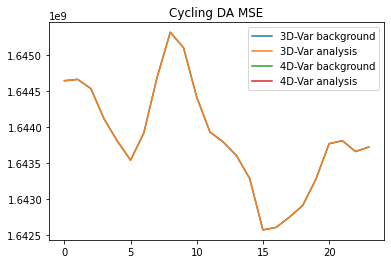

In [42]:
plt.figure()
plt.title('Cycling DA MSE')
plt.plot(var3d_f,label='3D-Var background')
plt.plot(var3d_a,label='3D-Var analysis')
plt.plot(var4d_f,label='4D-Var background')
plt.plot(var4d_a,label='4D-Var analysis')
plt.legend()
plt.savefig('figs/cycling_mse.png')

(82, 128, 256)
(82, 128, 256)
(82, 128, 256)


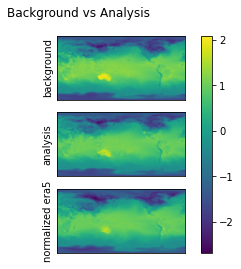

In [19]:
from torchvision.transforms import transforms
import torch

var3d_f_data = h5py.File(glob.glob(var3d_dir+'forecasts_{}_*.h5'.format(0))[0])['1']
# normalize forecast if needed
if np.max(var3d_f_data) > 100:
    f_mean = np.mean(var3d_f_data[0,:,:])
    f_std = np.std(var3d_f_data[0,:,:])
    var3d_f_data = (var3d_f_data - f_mean) / f_std

analysis1_3d = np.load(var3d_dir+'analysis_1_1201012014.npy')[0]

era5_dir = '/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_1_step_6hr_h5df/train/'
vars_climax = vars_climaX().vars_climax

#fig,axs = plt.subplots(2,1)
print(var3d_f_data.shape)
print(analysis1_3d.shape)
#plt.imshow(analysis1_3d[0,:,:]-var3d_f_data[0,:,:])
#axs[0].imshow(var3d_f_data[0,:,:])

era5_h5 = h5py.File(era5_dir+'2014_{:04d}.h5'.format(0))
era5_data = []
for var in vars_climax:
    era5_data.append(era5_h5['input'][var])
era5_data = np.array(era5_data)
print(era5_data.shape)
#axs[1].imshow(era5_data[0,:,:])

root_dir = '/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_1_step_6hr_h5df/'
normalize_mean = dict(np.load(os.path.join(root_dir, "normalize_mean.npz")))
normalize_mean = np.concatenate([normalize_mean[v] for v in vars_climax], axis=0)
normalize_std = dict(np.load(os.path.join(root_dir, "normalize_std.npz")))
normalize_std = np.concatenate([normalize_std[v] for v in vars_climax], axis=0)
transform_inp = transforms.Normalize(normalize_mean, normalize_std)
era5_norm = transform_inp(torch.from_numpy(era5_data))
era5_norm = np.array(era5_norm)

images = []
fig, axs = plt.subplots(3,1,sharex=True,sharey=True)
plt.suptitle('Background vs Analysis')
images.append(axs[0].imshow(var3d_f_data[0,:,:],origin='lower'))
#axs[0].set_title('background')
axs[0].xaxis.set_tick_params(labelbottom=False)
axs[0].yaxis.set_tick_params(labelleft=False)
axs[0].set_ylabel('background')
axs[0].set_xticks([])
axs[0].set_yticks([])
images.append(axs[1].imshow(analysis1_3d[0,:,:],origin='lower'))
#axs[1].set_title('analysis')
axs[1].xaxis.set_tick_params(labelbottom=False)
axs[1].yaxis.set_tick_params(labelleft=False)
axs[1].set_ylabel('analysis')
axs[1].set_xticks([])
axs[1].set_yticks([])
#images.append(axs[1].imshow(era5_data[0,:,:]))
images.append(axs[2].imshow(era5_norm[0,:,:],origin='lower'))
#axs[2].set_title('normalized era5')
axs[2].xaxis.set_tick_params(labelbottom=False)
axs[2].yaxis.set_tick_params(labelleft=False)
axs[2].set_ylabel('normalized era5')
axs[2].set_xticks([])
axs[2].set_yticks([])

vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0],ax=axs)

plt.savefig('figs/analysis_plot.png')

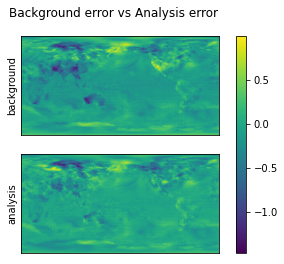

In [20]:
# print background error plot vs analysis error img (vs era5)

images = []
fig, axs = plt.subplots(2,1,sharex=True,sharey=True)
plt.suptitle('Background error vs Analysis error')
images.append(axs[0].imshow(era5_norm[0,:,:] - var3d_f_data[0,:,:],origin='lower'))
#axs[0].set_title('background')
axs[0].xaxis.set_tick_params(labelbottom=False)
axs[0].yaxis.set_tick_params(labelleft=False)
axs[0].set_ylabel('background')
axs[0].set_xticks([])
axs[0].set_yticks([])
images.append(axs[1].imshow(era5_norm[0,:,:] - analysis1_3d[0,:,:],origin='lower'))
#axs[1].set_title('analysis')
axs[1].xaxis.set_tick_params(labelbottom=False)
axs[1].yaxis.set_tick_params(labelleft=False)
axs[1].set_ylabel('analysis')
axs[1].set_xticks([])
axs[1].set_yticks([])
#images.append(axs[1].imshow(era5_data[0,:,:]))

vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0],ax=axs)

plt.savefig('figs/background_vs_analysis_err.png')

In [43]:
print('var3d_f :',var3d_f)
print('var3d_a :',var3d_a)

var3d_f : [1644643684.1920187, 1644661897.1971247, 1644534306.024908, 1644112264.5134816, 1643806830.232679, 1643541692.099748, 1643920171.290916, 1644688352.0998693, 1645314748.5335937, 1645101705.0100188, 1644414178.2952554, 1643931742.2170436, 1643795569.6412823, 1643606113.4727414, 1643289117.389102, 1642576451.6425037, 1642611578.516591, 1642753126.1552646, 1642912995.0313938, 1643276966.2297113, 1643770187.282863, 1643812907.707603, 1643661841.7269936, 1643724943.8454213]
var3d_a : [1644643702.6662958, 1644661893.324489, 1644534294.9996722, 1644112264.8829336, 1643806824.337241, 1643541694.74621, 1643920167.334858, 1644688348.4530258, 1645314740.99547, 1645101699.1394894, 1644414207.025736, 1643931748.4082882, 1643795577.1780612, 1643606124.4172044, 1643289126.1803951, 1642576467.6076984, 1642611585.445223, 1642753126.6622317, 1642912988.7410076, 1643276961.990984, 1643770215.0394301, 1643812906.4498625, 1643661836.8933406, 1643724941.8990042]


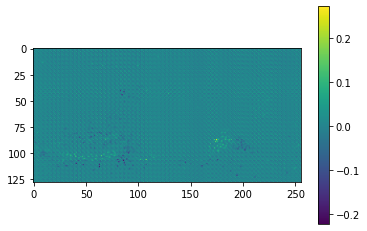

In [47]:
#analysis0_3d = np.load(var3d_dir+'analysis_0_12hr_01012014.npy')
#analysis1_3d = np.load(var3d_dir+'analysis_1_12hr_01012014.npy')
#analysis0_3d = np.load(var3d_dir+'background_0_12hr_01012014.npy')
#analysis1_3d = np.load(var3d_dir+'analysis_0_12hr_01012014.npy')
var3d_dir = '/eagle/MDClimSim/mjp5595/data/var3d/'
analysis0_3d = np.load(var3d_dir+'analysis_0_0001012014.npy')
analysis1_3d = np.load(var3d_dir+'analysis_1_1201012014.npy')
innov_3d = analysis1_3d - analysis0_3d

plt.figure()
#plt.imshow(innov_3d[0,0,:,:])
#plt.imshow(analysis0_3d[0,0,:,:])
#plt.imshow(analysis1_3d[0,0,:,:])
plt.imshow(analysis1_3d[0,0,:,:]-analysis0_3d[0,0,:,:])
plt.colorbar()

In [46]:
var3d_dir = '/eagle/MDClimSim/mjp5595/data/var3d/'
var3d_f_data = h5py.File(glob.glob(var3d_dir+'forecasts_{}_*.h5'.format(0))[0])

print('var3d_f_data.keys() :',var3d_f_data.keys())
#var3d_f_data['1'].shape

AttributeError: 'int' object has no attribute 'encode'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import torch
import inspect
sys.path.append("/eagle/MDClimSim/awikner/climax_4dvar_troy")
from datetime import *
from torch.utils.data import IterableDataset, DataLoader
from natsort import natsorted
from itertools import product
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

start_date = datetime(2014, 1, 1, hour = 0)
end_date = datetime(2015, 12, 31, hour = 12)
window_len = 0
window_step = 12
model_step = 12

lat = np.load('/eagle/MDClimSim/troyarcomano/1.40625deg_npz_40shards/lat.npy')
lon = np.load('/eagle/MDClimSim/troyarcomano/1.40625deg_npz_40shards/lon.npy')
filepath = "/eagle/MDClimSim/awikner/irga_1415_test1_obs.hdf5"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

vars = ['2m_temperature',
            '10m_u_component_of_wind',
            '10m_v_component_of_wind',
            'geopotential_500',
            'geopotential_700',
            'geopotential_850',
            'geopotential_925',
            'u_component_of_wind_250',
            'u_component_of_wind_500',
            'u_component_of_wind_700',
            'u_component_of_wind_850',
            'u_component_of_wind_925',
            'v_component_of_wind_250',
            'v_component_of_wind_500',
            'v_component_of_wind_700',
            'v_component_of_wind_850',
            'v_component_of_wind_925',
            'temperature_250',
            'temperature_500',
            'temperature_700',
            'temperature_850',
            'temperature_925',
            'specific_humidity_250',
            'specific_humidity_500',
            'specific_humidity_700',
            'specific_humidity_850',
            'specific_humidity_925']

def observe_linear(x, H_idxs, H_vals):
    output = torch.sum(H_vals * torch.concat((x[H_idxs[0]], x[H_idxs[1]], x[H_idxs[2]], x[H_idxs[3]]), axis = 1),
                       axis = 1).to(device)
    return output

class ObsDataset(IterableDataset):
    def __init__(self, file_path, start_datetime, end_datetime, window_len, window_step, model_step, vars):
        super().__init__()
        self.save_hyperparameters()
        datetime_diff = end_datetime - start_datetime
        hour_diff = datetime_diff.days*24 + datetime_diff.seconds // 3600
        self.all_obs_datetimes = [start_datetime + timedelta(hours = i) for i in \
                             range(0, hour_diff + model_step, model_step)]
        self.window_len_idxs = window_len // model_step + 1
        self.window_step_idxs = window_step // model_step
        self.num_cycles = (len(self.all_obs_datetimes) - self.window_len_idxs) // self.window_step_idxs

    def read_file(self):
        with h5py.File(self.file_path, 'r') as f:
            obs_datetimes = self.all_obs_datetimes[self.window_start: self.window_start + self.window_len_idxs]
            print('Obs. Datetimes')
            print(obs_datetimes)
            shapes = np.zeros((self.window_len_idxs, len(self.vars)), dtype = int)
            for (i, obs_datetime), (j, var) in product(enumerate(obs_datetimes), enumerate(self.vars)):
                shapes[i, j] = f[obs_datetime.strftime("%Y/%m/%d/%H") + '/' + var].shape[0]
            max_obs = np.max(shapes)
            all_obs = np.zeros((self.window_len_idxs, len(self.vars), max_obs))
            H_idxs = np.zeros((self.window_len_idxs, len(self.vars), 4*max_obs), dtype = 'i4')
            H_obs = np.zeros((self.window_len_idxs, len(self.vars), 4*max_obs))
            obs_latlon = np.zeros((self.window_len_idxs, len(self.vars), max_obs, 2))
            for (i, obs_datetime), (j, var) in product(enumerate(obs_datetimes), enumerate(self.vars)):
                all_obs[i, j, :shapes[i, j]] = f[obs_datetime.strftime("%Y/%m/%d/%H") + '/' + var][:, 2]
                H_idxs[i, j, :4*shapes[i, j]] = f[obs_datetime.strftime("%Y/%m/%d/%H") + '/' + var + '_H'][:, 0]
                H_obs[i, j, :4 * shapes[i, j]] = f[obs_datetime.strftime("%Y/%m/%d/%H") + '/' + var + '_H'][:, 1]
                obs_latlon[i, j, :shapes[i,j]] = f[obs_datetime.strftime("%Y/%m/%d/%H") + '/' + var][:, :2]
            output = (torch.from_numpy(all_obs).to(device), torch.from_numpy(H_idxs).long().to(device), torch.from_numpy(H_obs).to(device),
                      torch.from_numpy(shapes).long().to(device), obs_latlon)
            return output

    def __iter__(self):
        self.window_start = -self.window_step_idxs
        return self

    def __next__(self):
        if self.window_start <= len(self.all_obs_datetimes) - self.window_len_idxs:
            self.window_start += self.window_step_idxs
            return self.read_file()
        else:
            raise StopIteration

    def save_hyperparameters(self, ignore=[]):
        """Save function arguments into class attributes.

        Defined in :numref:`sec_utils`"""
        frame = inspect.currentframe().f_back
        _, _, _, local_vars = inspect.getargvalues(frame)
        self.hparams = {k: v for k, v in local_vars.items()
                        if k not in set(ignore + ['self']) and not k.startswith('_')}
        for k, v in self.hparams.items():
            setattr(self, k, v)
obs_dataset = ObsDataset(filepath, start_date, end_date, window_len, window_step, model_step, vars)
print(obs_dataset.vars)
loader = DataLoader(obs_dataset, batch_size = 1, num_workers=0)

dir_climax = '/eagle/MDClimSim/awikner/climax_4dvar_troy/data/climaX'
dir_identity = '/eagle/MDClimSim/awikner/climax_4dvar_troy/data/identity'
num_cycles = 30
num_cycles_init = 30
cycles = np.arange(num_cycles)
analysis_climax = []
background_init = []
#analysis_identity = []
background_climax = []
#background_identity = []
for file in ['analysis_%d.npy' % cycle for cycle in cycles]:
    analysis_climax.append(np.load(os.path.join(dir_climax, file)))
    #analysis_identity.append(np.load(os.path.join(dir_identity, file)))
for file in ['background_%d.npy' % cycle for cycle in cycles]:
    background_climax.append(np.load(os.path.join(dir_climax, file)))
for file in ['background_init_%d.npy' % cycle for cycle in range(num_cycles_init)]:
    background_init.append(np.load(os.path.join(dir_climax, file)))
#    background_identity.append(np.load(os.path.join(dir_identity, file)))
analysis_climax = np.array(analysis_climax)
#analysis_identity = np.array(analysis_identity)
background_climax = np.array(background_climax)
background_init = np.array(background_init)
#background_identity = np.array(background_identity)

era5_1 = np.load('/eagle/MDClimSim/awikner/2014_0.npz')
era5_2 = np.load('/eagle/MDClimSim/awikner/2014_1.npz')
means = np.load('/eagle/MDClimSim/awikner/normalize_mean.npz')
stds = np.load('/eagle/MDClimSim/awikner/normalize_std.npz')

vars = ['2m_temperature',
            '10m_u_component_of_wind',
            '10m_v_component_of_wind',
            'geopotential_500',
            'geopotential_700',
            'geopotential_850',
            'geopotential_925',
            'u_component_of_wind_250',
            'u_component_of_wind_500',
            'u_component_of_wind_700',
            'u_component_of_wind_850',
            'u_component_of_wind_925',
            'v_component_of_wind_250',
            'v_component_of_wind_500',
            'v_component_of_wind_700',
            'v_component_of_wind_850',
            'v_component_of_wind_925',
            'temperature_250',
            'temperature_500',
            'temperature_700',
            'temperature_850',
            'temperature_925',
            'specific_humidity_250',
            'specific_humidity_500',
            'specific_humidity_700',
            'specific_humidity_850',
            'specific_humidity_925']

print(analysis_climax[0].shape)
#print(analysis_identity[0].shape)

#plt.plot(np.mean((analysis_climax - analysis_identity)**2.0, axis = (1, 2, 3, 4)))
#plt.show()



error_climax = np.zeros((cycles.size, len(vars), 128, 256))
error_climax_bkg = np.zeros((cycles.size, len(vars), 128, 256))
error_climax_bkg_init = np.zeros((num_cycles_init, len(vars), 128, 256))

obs_climax = np.zeros((cycles.size, len(vars)), dtype = object)
obs_climax_bkg = np.zeros((cycles.size, len(vars)), dtype = object)
obs_climax_bkg_init = np.zeros((cycles.size, len(vars)), dtype = object)
obs_era5 = np.zeros((cycles.size, len(vars)), dtype = object)

obs_error_climax = np.zeros((cycles.size, len(vars)), dtype = object)
obs_error_climax_bkg = np.zeros((cycles.size, len(vars)), dtype = object)
obs_error_climax_bkg_init = np.zeros((cycles.size, len(vars)), dtype = object)
obs_error_era5 = np.zeros((cycles.size, len(vars)), dtype = object)

era5 = np.zeros((era5_1['2m_temperature'].shape[0] + era5_2['2m_temperature'].shape[0], len(vars), 128, 256))

for i, var in enumerate(vars):
    era5[:, i] = np.concatenate((era5_1[var], era5_2[var]), axis = 0)

for i, var in enumerate(vars):
    era5_var = (era5[0:num_cycles*12:12, 0] - means[var][0])/stds[var][0]
    era5_var_init = (era5[0:num_cycles_init*12:12, 0] - means[var][0])/stds[var][0]
    error_climax[:, i] = era5_var - analysis_climax[:, 0, i]
    #error_identity[:, i] = era5_var - analysis_identity[:, 0, i]
    error_climax_bkg[:, i] = era5_var - background_climax[:, 0, i]
    error_climax_bkg_init[:, i] = era5_var_init - background_init[:, 0, i]
    #error_identity_bkg[:, i] = era5_var - background_identity[:, 0, i]

def rms_error(error):
    error_means = np.zeros(error.shape)
    for i, j in product(range(error_means.shape[0]), range(error_means.shape[1])):
        error_means[i, j] = np.mean(error[i,j]**2.0)
    return np.sqrt(error_means)

for cycle, (all_obs, H_idxs, H_obs, n_obs, obs_latlon) in zip(cycles, loader):
    for i, var in enumerate(vars):
        era5 = np.concatenate((era5_1[var], era5_2[var]), axis = 0)
        era5_var = (era5[cycle*12, 0] - means[var][0])/stds[var][0] 
        obs_era5 = observe_linear(torch.from_numpy(era5_var.reshape(-1,1)).to(device), H_idxs[0, 0, i, :4*n_obs[0, 0,i]].reshape(-1, 4).T , H_obs[0, 0, i, :4*n_obs[0, 0,i]].reshape(-1, 4))
        obs_climax = observe_linear(torch.from_numpy(analysis_climax[cycle, 0, i].reshape(-1,1)).to(device), H_idxs[0, 0, i, :4*n_obs[0, 0,i]].reshape(-1, 4).T , H_obs[0, 0, i, :4*n_obs[0, 0,i]].reshape(-1, 4))
        obs_climax_bkg = observe_linear(torch.from_numpy(background_climax[cycle, 0, i].reshape(-1,1)).to(device), H_idxs[0, 0, i, :4*n_obs[0, 0,i]].reshape(-1, 4).T , H_obs[0, 0, i, :4*n_obs[0, 0,i]].reshape(-1, 4))
        obs_climax_bkg_init = observe_linear(torch.from_numpy(background_init[cycle, 0, i].reshape(-1,1)).to(device), H_idxs[0, 0, i, :4*n_obs[0, 0,i]].reshape(-1, 4).T , H_obs[0, 0, i, :4*n_obs[0, 0,i]].reshape(-1, 4))

        #if 'wind' in var:
        #    obs_in = (-all_obs[0,0,i,:n_obs[0,0,i]].detach().cpu().numpy()*stds[var][0] - means[var][0] - means[var][0])/stds[var][0]
        #    obs_error_era5[cycle, i] = obs_era5.detach().cpu().numpy() -obs_in
        #    obs_error_climax[cycle, i] = obs_climax.detach().cpu().numpy() - obs_in
        #    obs_error_climax_bkg[cycle, i] = obs_climax_bkg.detach().cpu().numpy() - obs_in
        #    obs_error_climax_bkg_init[cycle, i] = obs_climax_bkg_init.detach().cpu().numpy() - obs_in
        obs_error_era5[cycle, i] = obs_era5.detach().cpu().numpy() - all_obs[0,0,i,:n_obs[0,0,i]].detach().cpu().numpy()
        obs_error_climax[cycle, i] = obs_climax.detach().cpu().numpy() - all_obs[0,0,i,:n_obs[0,0,i]].detach().cpu().numpy()
        obs_error_climax_bkg[cycle, i] = obs_climax_bkg.detach().cpu().numpy() - all_obs[0,0,i,:n_obs[0,0,i]].detach().cpu().numpy()
        obs_error_climax_bkg_init[cycle, i] = obs_climax_bkg_init.detach().cpu().numpy() - all_obs[0,0,i,:n_obs[0,0,i]].detach().cpu().numpy()

        fig, axs = plt.subplots(2, 3, figsize = (15, 7), sharey = True, sharex = True)

        era5_max = np.max(era5_var*stds[var][0] + means[var][0])
        era5_min = np.min(era5_var*stds[var][0] + means[var][0])
        climax_max = np.max(analysis_climax[cycle, 0, i]*stds[var][0] + means[var][0])
        climax_min = np.min(analysis_climax[cycle, 0, i]*stds[var][0] + means[var][0])
        obs_max = np.max(all_obs[0,0,i,:n_obs[0,0,i]].detach().cpu().numpy()*stds[var][0] +means[var][0])
        obs_min = np.min(all_obs[0,0,i,:n_obs[0,0,i]].detach().cpu().numpy()*stds[var][0] +means[var][0])

        plt_max = np.max(np.array([era5_max, climax_max, obs_max]))
        plt_min = np.min(np.array([era5_min, climax_min, obs_min]))

        era5_err_max = np.max((era5_var - analysis_climax[cycle, 0, i])*stds[var][0])
        era5_err_min = np.min((era5_var - analysis_climax[cycle, 0, i])*stds[var][0])
        era5_obs_err_max = np.max(-obs_error_era5[cycle, i]*stds[var][0])
        era5_obs_err_min = np.min(-obs_error_era5[cycle, i]*stds[var][0])
        climax_obs_err_max = np.max(-obs_error_climax[cycle, i]*stds[var][0])
        climax_obs_err_min = np.min(-obs_error_climax[cycle, i]*stds[var][0])

        err_lim = np.max(np.abs(np.array([era5_err_max, era5_err_min, era5_obs_err_max, era5_obs_err_min, climax_obs_err_max, climax_obs_err_min])))


        pcm1 = axs[0,0].pcolormesh(era5_var*stds[var][0] + means[var][0], vmin = plt_min, vmax = plt_max,
                                   cmap = 'viridis')
        plt.colorbar(pcm1, ax=axs[0,0])
        pcm2 = axs[0,1].pcolormesh(analysis_climax[cycle, 0, i]*stds[var][0] + means[var][0], vmin = plt_min, vmax = plt_max, cmap = 'viridis')
        plt.colorbar(pcm2, ax=axs[0,1])
        pcm3 = axs[0,2].pcolormesh((era5_var - analysis_climax[cycle, 0, i])*stds[var][0], vmin = - err_lim, vmax = err_lim, cmap = 'bwr')
        plt.colorbar(pcm3, ax=axs[0,2])
        axs[0,0].set_title('ERA5')
        axs[0,1].set_title('Analysis')
        axs[0,2].set_title('ERA5 - Analysis')
        #print(means[var][0])
        #print(stds[var][0])
        plot_lat = (obs_latlon[0, 0, i, :n_obs[0, 0, i], 0]+90)*128/180
        plot_lon = obs_latlon[0, 0, i, :n_obs[0, 0, i], 1]
        plot_lon[plot_lon < 0] = plot_lon[plot_lon < 0] + 360
        plot_lon = plot_lon * 256/360
        scp = axs[1,0].scatter(plot_lon, plot_lat, c = all_obs[0,0,i,:n_obs[0,0,i]].detach().cpu().numpy()*stds[var][0] +means[var][0], s = 35, edgecolor='k', vmin = plt_min, vmax = plt_max, cmap = 'viridis')
        plt.colorbar(scp, ax = axs[1,0])
        #axs[1,0].set_xlabel('Lon')
        #axs[1,0].set_ylabel('Lat')
        axs[1,0].set_title('Observation')

        scp2 = axs[1,1].scatter(plot_lon, plot_lat, c = -obs_error_era5[cycle, i]*stds[var][0], s = 35, edgecolor='k', vmin = -err_lim, vmax = err_lim, cmap = 'bwr')
        plt.colorbar(scp2, ax = axs[1,1])
        axs[1,1].set_title('Obs - H(ERA5)')

        scp3 = axs[1,2].scatter(plot_lon, plot_lat, c = -obs_error_climax[cycle, i]*stds[var][0], s = 35, edgecolor='k', vmin = -err_lim, vmax = err_lim, cmap = 'bwr')
        plt.colorbar(scp3, ax = axs[1,2])
        axs[1,2].set_title('Obs - H(Analysis)')

        plt.suptitle('%s, Cycle %d' % (var, cycle))
        plt.savefig(f'/eagle/MDClimSim/awikner/climax_4dvar_troy/data/climaX/plots/cycle{cycle:04}_{var}.png', bbox_inches = 'tight')
        plt.close(fig)
        #plt.show()
    #plt.suptitle('Cycle %d' % cycle)
    #plt.show()
    #plt.clf()

    #fig = plt.figure(figsize = (7,10))
    #plt.plot(rms_error(obs_error_climax)[cycle], np.arange(len(vars)), label = 'ClimaX Analysis')
    #plt.plot(rms_error(obs_error_climax_bkg)[cycle], np.arange(len(vars)), label = 'ClimaX Background')
    #plt.plot(rms_error(obs_error_climax_bkg_init)[cycle], np.arange(len(vars)), label = 'ClimaX from Initial Background')
    #plt.plot(rms_error(obs_error_era5)[cycle], np.arange(len(vars)), label = 'ERA5')
    #plt.yticks(ticks = np.arange(len(vars)), labels = vars)
    #plt.legend()
    #plt.ylabel('Variable')
    #plt.xlabel('Observation RMSE')
    #ax = plt.gca()
    #make_axes_area_auto_adjustable(ax)
    #plt.show()

def rms_error(error):
    error_means = np.zeros(error.shape)
    for i, j in product(range(error_means.shape[0]), range(error_means.shape[1])):
        error_means[i, j] = np.mean(error[i,j]**2.0)
    return np.sqrt(np.mean(error_means, axis = 1))

plt.plot(np.sqrt(np.mean(error_climax**2.0, axis = (1, 2, 3))), label = 'ClimaX')
#plt.plot(np.mean(error_identity**2.0, axis = (1, 2, 3)), '--', label = 'Identity')
plt.plot(np.sqrt(np.mean(error_climax_bkg**2.0, axis = (1, 2, 3))),label = 'ClimaX Background')
plt.plot(np.sqrt(np.mean(error_climax_bkg_init**2.0, axis = (1, 2, 3))),label = 'ClimaX from initial background')
#plt.plot(np.mean(error_identity_bkg**2.0, axis = (1, 2, 3)), '--', label = 'Identity Background')
plt.legend()
plt.show()

plt.plot(rms_error(obs_error_climax), label = 'ClimaX Analysis')
#plt.plot(np.mean(error_identity**2.0, axis = (1, 2, 3)), '--', label = 'Identity')
plt.plot(rms_error(obs_error_climax_bkg),label = 'ClimaX Background')
plt.plot(rms_error(obs_error_climax_bkg_init),label = 'ClimaX from initial background')
plt.plot(rms_error(obs_error_era5), label = 'ERA5')
#plt.plot(np.mean(error_identity_bkg**2.0, axis = (1, 2, 3)), '--', label = 'Identity Background')
plt.legend()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 5))
plt1 = axs[0].pcolormesh(analysis_climax[-1, 0, 8])
axs[0].set_title(vars[8])
fig.colorbar(plt1, ax = axs[0])
plt2 = axs[1].pcolormesh(analysis_climax[-1, 0, 13])
axs[1].set_title(vars[13])
fig.colorbar(plt2, ax = axs[1])
plt.show()


"""
end_loss = np.array(end_loss)
plt.semilogy(np.sum(end_loss, axis = 1), label = 'Total')
plt.semilogy(np.sum(end_loss[:, :27], axis = 1), label = 'Background')
plt.semilogy(np.sum(end_loss[:,27:27*2], axis = 1), label = 'Background HF')
plt.semilogy(end_loss[:, 27*2 + 8], label = 'Obs. U Wind 250')
plt.grid()
plt.legend()
plt.show()

loss_comps = []
for file in files:
    loss_comps.append(np.load(os.path.join(dir, file)))

loss_comps = np.array(loss_comps)

plt.semilogy(np.sum(loss_comps, axis = 1), label = 'Total')
plt.semilogy(np.sum(loss_comps[:, :27], axis = 1), label = 'Background')
plt.semilogy(np.sum(loss_comps[:,27:27*2], axis = 1), label = 'Background HF')
plt.semilogy(loss_comps[:, 27*2 + 8], label = 'Obs. U Wind 250')
plt.ylim(1e1, 1e7)
plt.grid()
plt.legend()
plt.show()
"""
